# aula = "Clusterização Particional"



## Como funciona a Clusterização Particional

A clusterização Particional é uma estratégia de agrupamento que busca encontrar por uma matriz de partição de um conjunto de observações.



## Algoritmo k-means

Objetiva particionar 𝑁 observações dentre 𝑘 grupos em que cada observação pertence ao grupo mais próximo da média.

**Algoritmo**
1. Escolher K centroides
2. Atribuir cada observação ao centroide mais próximo
3. Atualizar a posição do centroide como a média de todos os elementos do grupo
4. Testar se após a atualização os centroides mudaram:
    1. Se sim, volta ao passo 2
    2. Se não, encerra
    
    
**Pontos Fortes**
* Simples e Intuitivo
* Complexidade Linear em todos os parâmetros importantes
* Funciona bem em muitos cenários práticos
* Resultado de interpretação simples

**Pontos de Atenção**
* Necessidade de definir k
* Sensível a inicialização
* Limita-se a encontrar grupos volumétricos/globulares
* Cada item deve pertencer a um único cluster (partição rígida)
* Limitado a atributos numéricos
* Sensível a outliers


## Implementação do algoritmo k-means em Python

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/tamanho_pinguins.csv')
data.sample(5)

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
178,Chinstrap,Dream,50.5,18.4,200.0,3400.0,FEMALE
28,Adelie,Biscoe,37.9,18.6,172.0,3150.0,FEMALE
260,Gentoo,Biscoe,42.7,13.7,208.0,3950.0,FEMALE
134,Adelie,Dream,38.1,17.6,187.0,3425.0,FEMALE
165,Chinstrap,Dream,52.0,18.1,201.0,4050.0,MALE


In [3]:
# nesse caso iremos apenas apagar as linhas que possuem valores faltantes
data = data.dropna()

# excluir outliers
data = data[data.larg_bico_mm < 50]

In [4]:
X, y = data.iloc[:, 2:-1], data.iloc[:, 0]

In [5]:
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [6]:
x = X_[:, [0,2]]

In [7]:
def k_means(data, k, threshhold=2):
    
    n = np.size(data, 0)
    
    cluster_centers = np.random.choice(range(0, n), k)
    clustering = np.random.randint(0, k, n)
    cluster_means = data[cluster_centers]
    old_clustering = np.zeros(n)
    
    while np.sum(clustering != old_clustering) > threshhold:
        old_clustering = clustering
        
        cluster_distances = np.zeros((n, k))
        for cluster in range(k):
            cluster_distances[:, cluster] = np.sum(np.sqrt((data - cluster_means[cluster])**2), 1)
        clustering = np.argmin(cluster_distances, 1)
        
        cluster_means = np.array([np.mean(data[clustering==c], 0) for c in range(k)])
    
    return cluster_means, clustering

In [8]:
centers, labels = k_means(x, 3)

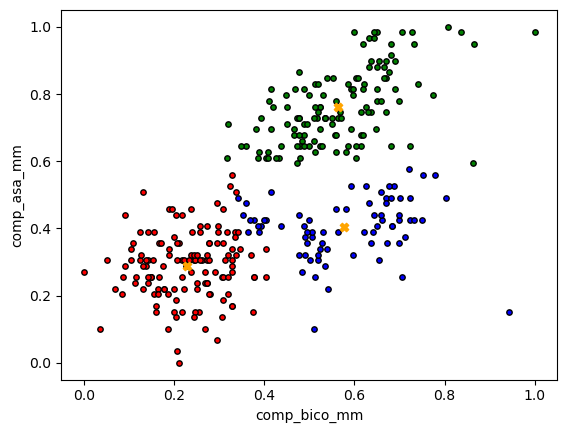

In [9]:
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], color="blue", edgecolors='black', s=15)
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], color="red", edgecolors='black', s=15)
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], color="green", edgecolors='black', s=15)
plt.scatter(centers[:,0], centers[:,1], color='orange', marker='X')
plt.xlabel('comp_bico_mm')
plt.ylabel('comp_asa_mm');

## Algoritmo k-medoids

Objetiva particionar 𝑁 observações dentre 𝑘 grupos em que cada observação pertence ao grupo mais próximo da média.

**Algoritmo**
1. Escolher K centroides
2. Atribuir cada observação ao centroide mais próximo
3. Atualizar a posição do centroide como a média de todos os elementos do grupo
4. Substituir cada centroide por uma observação representativa do cluster, **medóide**
4. Testar se após a atualização os centroides mudaram:
    1. Se sim, volta ao passo 2
    2. Se não, encerra
    
    
**Pontos Fortes**
* Simples e Intuitivo
* Funciona bem em muitos cenários práticos
* Resultado de interpretação simples
* Menos Sensível a outliers
* Pode ser aplicado a dados categóricos
* Convergência assegurada com qualquer medida de similaridade

**Pontos de Atenção**
* Necessidade de definir k
* Cada item deve pertencer a um único cluster (partição rígida)
* Complexidade quadrática no número de objetos

## Implementação do algoritmo k-medoids em Python

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
sns.set_theme(style="darkgrid", palette="pastel")
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [11]:
data = pd.read_csv('data/tamanho_pinguins.csv')
data.head()

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [12]:
# nesse caso iremos apenas apagar as linhas que possuem valores faltantes
data = data.dropna()

# excluir outliers
data = data[data.larg_bico_mm < 50]

In [13]:
X, y = data.iloc[:, 2:-1], data.iloc[:, 0]

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [14]:
x = X_[:, [0,2]]

In [15]:
# Implentação do Kmeans

def k_means(data, k, threshhold=2):
    
    n = np.size(data, 0)
    
    cluster_centers = np.random.choice(range(0, n), k)
    clustering = np.random.randint(0, k, n)
    cluster_means = data[cluster_centers]
    old_clustering = np.zeros(n)
    
    while np.sum(clustering != old_clustering) > threshhold:
        old_clustering = clustering
        
        cluster_distances = np.zeros((n, k))
        for cluster in range(k):
            cluster_distances[:, cluster] = np.sum(np.sqrt((data - cluster_means[cluster])**2), 1)
        clustering = np.argmin(cluster_distances, 1)
        
        cluster_means = np.array([np.mean(data[clustering==c], 0) for c in range(k)])
    
    return cluster_means, clustering

In [16]:
def k_medoids(data, k, threshhold=2):
    
    n = np.size(data, 0)
    
    cluster_centers = np.random.choice(range(0, n), k)
    clustering = np.random.randint(0, k, n)
    cluster_means = data[cluster_centers]
    old_clustering = np.zeros(n)
    
    while np.sum(clustering != old_clustering) > threshhold:
        old_clustering = clustering
        
        cluster_distances = np.zeros((n, k))
        for cluster in range(k):
            cluster_distances[:, cluster] = np.sum(np.sqrt((data - cluster_means[cluster])**2), 1)
        clustering = np.argmin(cluster_distances, 1)
        
        temp_cluster_means = np.array([np.mean(data[clustering==c], 0) for c in range(k)])
        
        cluster_means = []
        for ncluster in range(k):
            distances_means = np.sum(np.sqrt((data[clustering == ncluster] - temp_cluster_means[ncluster])**2), 1)
            cluster_means.append(list(data[clustering == ncluster][np.argmin(distances_means)]))
    
    return np.array(cluster_means), clustering

In [17]:
'''from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

cluster_centers = kmeans.cluster_centers_
clustering = kmeans.labels_'''

'from sklearn.cluster import KMeans\n\nkmeans = KMeans(n_clusters=3)\nkmeans.fit(x)\n\ncluster_centers = kmeans.cluster_centers_\nclustering = kmeans.labels_'

In [18]:
k_medoids(x, 3)

(array([[0.23272727, 0.30508475],
        [0.62181818, 0.38983051],
        [0.56      , 0.77966102]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        

In [19]:
centers, labels = k_medoids(x, 3)

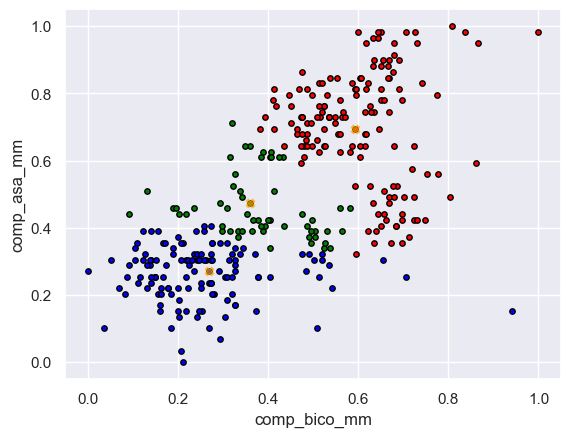

In [20]:
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], color="blue", edgecolors='black', s=15)
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], color="red", edgecolors='black', s=15)
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], color="green", edgecolors='black', s=15)
plt.scatter(centers[:,0], centers[:,1], color='orange', marker='X', alpha=.6)
plt.xlabel('comp_bico_mm')
plt.ylabel('comp_asa_mm');

## Clusterização Particional na Prática

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [7]:
# arquivo original countries of the world.csv
df = pd.read_csv('data/paises_do_mundo.csv')
df.dropna(inplace=True)
df.head()

,pais,regiao,populacao,area,densidade_populacional,costa,imigracao,mortalidade_infantil,pib_per_capta,perc_alfabetizacao,telefones,pec_aravel,perc_plantacao,perc_outras,clima,taxa_nascimento,taxa_mortalidade,agricultura,industria,servicos
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743


In [8]:
X = df.iloc[:, 4:10].copy()
X

,densidade_populacional,costa,imigracao,mortalidade_infantil,pib_per_capta,perc_alfabetizacao
0,48.0,0.00,23.06,163.07,700.0,36.0
1,124.6,1.26,-4.93,21.52,4500.0,86.5
2,13.8,0.04,-0.39,31.00,6000.0,70.0
6,132.1,59.80,10.76,21.03,8600.0,95.0
7,156.0,34.54,-6.15,19.46,11000.0,89.0
...,...,...,...,...,...,...
218,28.2,0.31,-0.04,22.20,4800.0,93.4
219,256.1,1.05,-0.45,25.95,2500.0,90.3
224,40.6,0.36,0.00,61.50,800.0,50.2
225,15.3,0.00,0.00,88.29,800.0,80.6


In [9]:
X.drop('costa', axis=1, inplace=True)

In [10]:
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [12]:
# visualização 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_)

print(pca.explained_variance_ratio_)

[0.68280947 0.18073361]


C:\Users\paulo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\paulo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\paulo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\paulo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

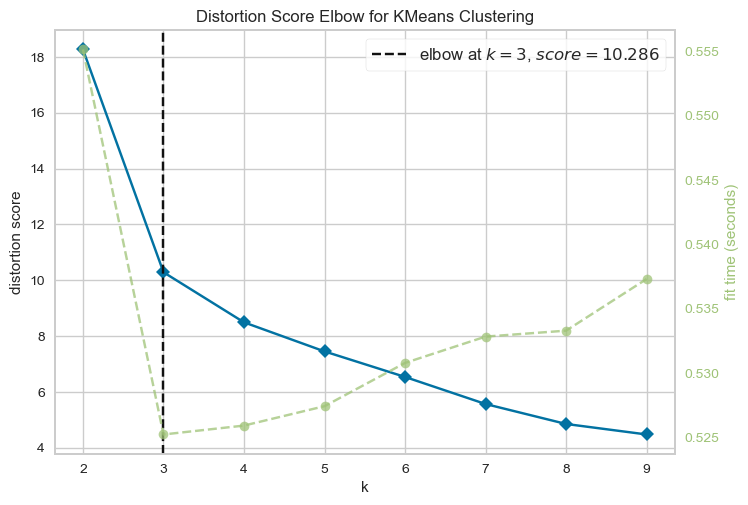

In [13]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),metric='distortion', timings= True)
visualizer.fit(X_) 
visualizer.show(); 

In [ ]:
k=5
kmeans = KMeans(n_clusters=k, random_state=3, n_init="auto").fit(X_)
labels = kmeans.labels_

In [ ]:
# Dados Reais
for n in range(k):
    plt.scatter(pca_features[labels == n, 0], pca_features[labels == n, 1], edgecolors='black', s=15)
plt.plot();
   

In [ ]:
X['cluster'] = labels
X.groupby(by='cluster').mean()

In [ ]:
X

In [ ]:
df['cluster'] = labels

In [ ]:
df.groupby(['cluster', 'regiao'])['regiao'].count()

In [ ]:
df['regiao'].value_counts()